In [19]:
from tensorflow import keras
import tensorflow
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image

In [20]:
symbols_list = ['zero','one','two','three','four','five','six','seven','eight','nine','minus','plus','equal','div','decimal','times']

In [21]:
IMAGE_SIZE = (100,100)

In [22]:
tensorflow.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [23]:
dataset_path = "./projekat/handwritten_bolji/train"
train_image = []
train_label = []

for symbols_dir in os.listdir(dataset_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir(dataset_path + "/" + symbols_dir):
            train_label.append(symbols_dir.split()[0])
            train_image.append(dataset_path + "/" + symbols_dir + "/" + image)

In [24]:
eval_path = "./projekat/handwritten_bolji/eval"
test_image = []
test_label = []

for symbols_dir in os.listdir(eval_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir(eval_path + "/" + symbols_dir):
            test_label.append(symbols_dir.split()[0])
            test_image.append(eval_path + "/" + symbols_dir + "/" + image)

In [25]:
X_train = []
X_test = []

# laoding the images from the path
for path in train_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = np.array(img)
    X_train.append(img)

for path in test_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = np.array(img)     
    X_test.append(img)

# creating numpy array from the images
X_train = np.array(X_train)
X_test = np.array(X_test)

In [26]:
# normalizing the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (7557, 100, 100, 3)
X_test shape:  (1010, 100, 100, 3)


./projekat/handwritten_bolji/train/decimal/1003.jpg
decimal


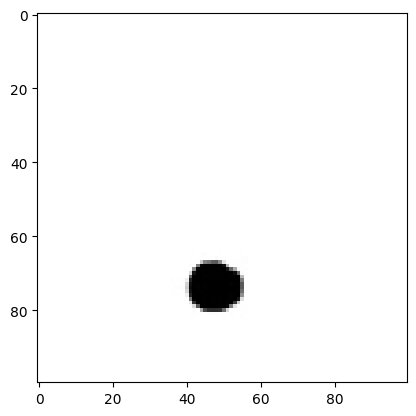

In [27]:
print(train_image[0])
print(train_label[0])
plt.imshow(X_train[0])

In [28]:
y_train = np.array([[0] * 16 for _ in range(len(train_label))])

for i, category in enumerate(train_label):
    index = symbols_list.index(category)
    y_train[i][index] = 1
y_test = np.array([[0] * 16 for _ in range(len(test_label))])

for i, category in enumerate(test_label):
    index = symbols_list.index(category)
    y_train[i][index] = 1

print(y_test.shape)
print(y_train.shape)

(1010, 16)
(7557, 16)


In [29]:
###  MODEL 

In [30]:
from keras.applications.resnet_v2 import ResNet50V2, preprocess_input, decode_predictions

In [31]:
transfer_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3))

In [32]:
transfer_model.trainable = False

In [33]:
inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3))
x = transfer_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(16, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 4, 4, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                32784     
Total params: 23,597,584
Trainable params: 32,784
Non-trainable params: 23,564,800
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', loss=keras.metrics.categorical_crossentropy, metrics=['accuracy'])

In [38]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=16
)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.